In [94]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import time, datetime
import numpy as np
import matplotlib.pyplot as plt 
import math
import pickle
import bokeh
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure

# Final Project: Motor Vehicle Collisions - Crashes of New York City#
## Introduction and Motivation ##
The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC.<a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >[1]</a> We found this data-set a good fit for our final project, because it has some overlapping features with the Police Department Incident Reports data-set we have worked on a lot, so we can apply many methods and techniques we learned in the exercises. By the way, there is also some other interesting features we can explore with our own imaginations. In addition to this, all of us are quite concerned about the public safety and find it interesting to learn more about traffic problems in big cities such as New York City. We would like to provide readers some insights about when, where and why motor vehicle collisions happen in NYC, the impact of these terrible collisions and the approaches we can do to protect ourselves from danger.

Apart from the basic data analysis to help our readers to get an overview of the data-set, we have our story telling focus on the cyclists perspective. As all of us enjoy cycling a lot and so do many living in Denmark, we would like to investigate the severeness of motor vehicle collisions have on the cyclists and to see the trend and offer possible suggestions. 

The raw data-set consists of 1407835(1407831 with at least one variable available) rows and 29 variables/columns. The motor vehicle collisions were recorded from 2012 to 2021 as we downloaded the latest version. Cases recorded distribute in 5 boroughs in NYC and they are Bronx, Brooklyn, Manhattan, Queens and Staten Island. 

In [50]:
#import csv file of the target data-set
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

#we want to have access to dataframe.dt.year/month/day/hour/minute
#change crash date format into the date format of standard dataframe
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'].astype(str), format='%m/%d/%Y', errors='coerce')
#change crash time format into the time format of standard dataframe
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'].astype(str), format='%H:%M')

#access the number of rows
print("The number of rows of the raw data-set is: {}".format(len(df)))
print("The number of rows of the data-set without rows containing no information is: {}"
      .format(len(df.dropna(how='all'))))
#access the number of variables/columns
print("The number of variables/columns of the data-set is: {}".format(len(df.columns)))
#access all variables
print("The variables of the data-set are: {}".format(np.array(df.columns)))

The number of rows of the raw data-set is: 1407835
The number of rows of the data-set without rows containing no information is: 1407831
The number of variables/columns of the data-set is: 29
The variables of the data-set are: ['CRASH DATE' 'CRASH TIME' 'BOROUGH' 'ZIP CODE' 'LATITUDE' 'LONGITUDE'
 'LOCATION' 'ON STREET NAME' 'CROSS STREET NAME' 'OFF STREET NAME'
 'NUMBER OF PERSONS INJURED' 'NUMBER OF PERSONS KILLED'
 'NUMBER OF PEDESTRIANS INJURED' 'NUMBER OF PEDESTRIANS KILLED'
 'NUMBER OF CYCLIST INJURED' 'NUMBER OF CYCLIST KILLED'
 'NUMBER OF MOTORIST INJURED' 'NUMBER OF MOTORIST KILLED'
 'CONTRIBUTING FACTOR VEHICLE 1' 'CONTRIBUTING FACTOR VEHICLE 2'
 'CONTRIBUTING FACTOR VEHICLE 3' 'CONTRIBUTING FACTOR VEHICLE 4'
 'CONTRIBUTING FACTOR VEHICLE 5' 'COLLISION_ID' 'VEHICLE TYPE CODE 1'
 'VEHICLE TYPE CODE 2' 'VEHICLE TYPE CODE 3' 'VEHICLE TYPE CODE 4'
 'VEHICLE TYPE CODE 5']


In [51]:
#access all years included in the data-set and sort them by numbers
years = np.array(df['CRASH DATE'].dt.year.drop_duplicates().dropna().sort_values()).astype(int)
print("Years involved in the motor vehicle collisions are: {}".format(years))
#access all boroughs included in the data-set and sort them by alphabets
boroughs = np.array(df['BOROUGH'].drop_duplicates().dropna().sort_values())
print("Boroughs involved in the motor vehicle collisions are: {}".format(boroughs))

Years involved in the motor vehicle collisions are: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Boroughs involved in the motor vehicle collisions are: ['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


In [52]:
#enable the label for months
months = np.array(df['CRASH DATE'].dt.month.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for days
days = np.array(df['CRASH DATE'].dt.day.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for hours
hours = np.array(df['CRASH TIME'].dt.hour.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for minutes
minutes = np.array(df['CRASH TIME'].dt.minute.drop_duplicates().dropna().sort_values()).astype(int)

In [53]:
df = df.dropna(how='all') #drop rows containing no information

count_year = df['CRASH DATE'].dt.year.value_counts().sort_index()
count_month = df['CRASH DATE'].dt.month.value_counts().sort_index()
count_day = df['CRASH DATE'].dt.day.value_counts().sort_index()
count_hour = df['CRASH TIME'].dt.hour.value_counts().sort_index()
count_minute = df['CRASH TIME'].dt.minute.value_counts().sort_index()

count_borough = df['BOROUGH'].value_counts().sort_index()

person_injured = df['NUMBER OF PERSONS INJURED'].value_counts().sort_index()
person_killed = df['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
pedestrian_injured = df['NUMBER OF PEDESTRIANS INJURED'].value_counts().sort_index()
pedestrian_killed = df['NUMBER OF PEDESTRIANS KILLED'].value_counts().sort_index()
cyclist_injured = df['NUMBER OF CYCLIST INJURED'].value_counts().sort_index()
cyclist_killed = df['NUMBER OF CYCLIST KILLED'].value_counts().sort_index()
motorist_injured = df['NUMBER OF MOTORIST INJURED'].value_counts().sort_index()
motorist_killed = df['NUMBER OF MOTORIST KILLED'].value_counts().sort_index()

## Basic Stats##

### Number of motor vehicle collisions by different time units###
We can conclude that there is no significant difference between months and days regarding the number of cases. There is fewer cases on the 31$^{\text{st}}$ because not all months have 31 days. There is a bit fewer cases happening in April, May and June. Most of the motor collisions were recorded between 2015 and 2019. Most of the cases occurred in the afternoon, between 14 and 18, with maximum in 16 and 17. At these time intervals, most of people are off work and rush to go back home, causing intense pressure of the traffic and that can be the reason for the boosting of motor collisions. We found it interesting that minutes recorded are mostly round numbers, for example, 0, 5, 10, 15... Police officers might keep the habit of keeping round minutes and that can correspond to people's common habits of telling time. 

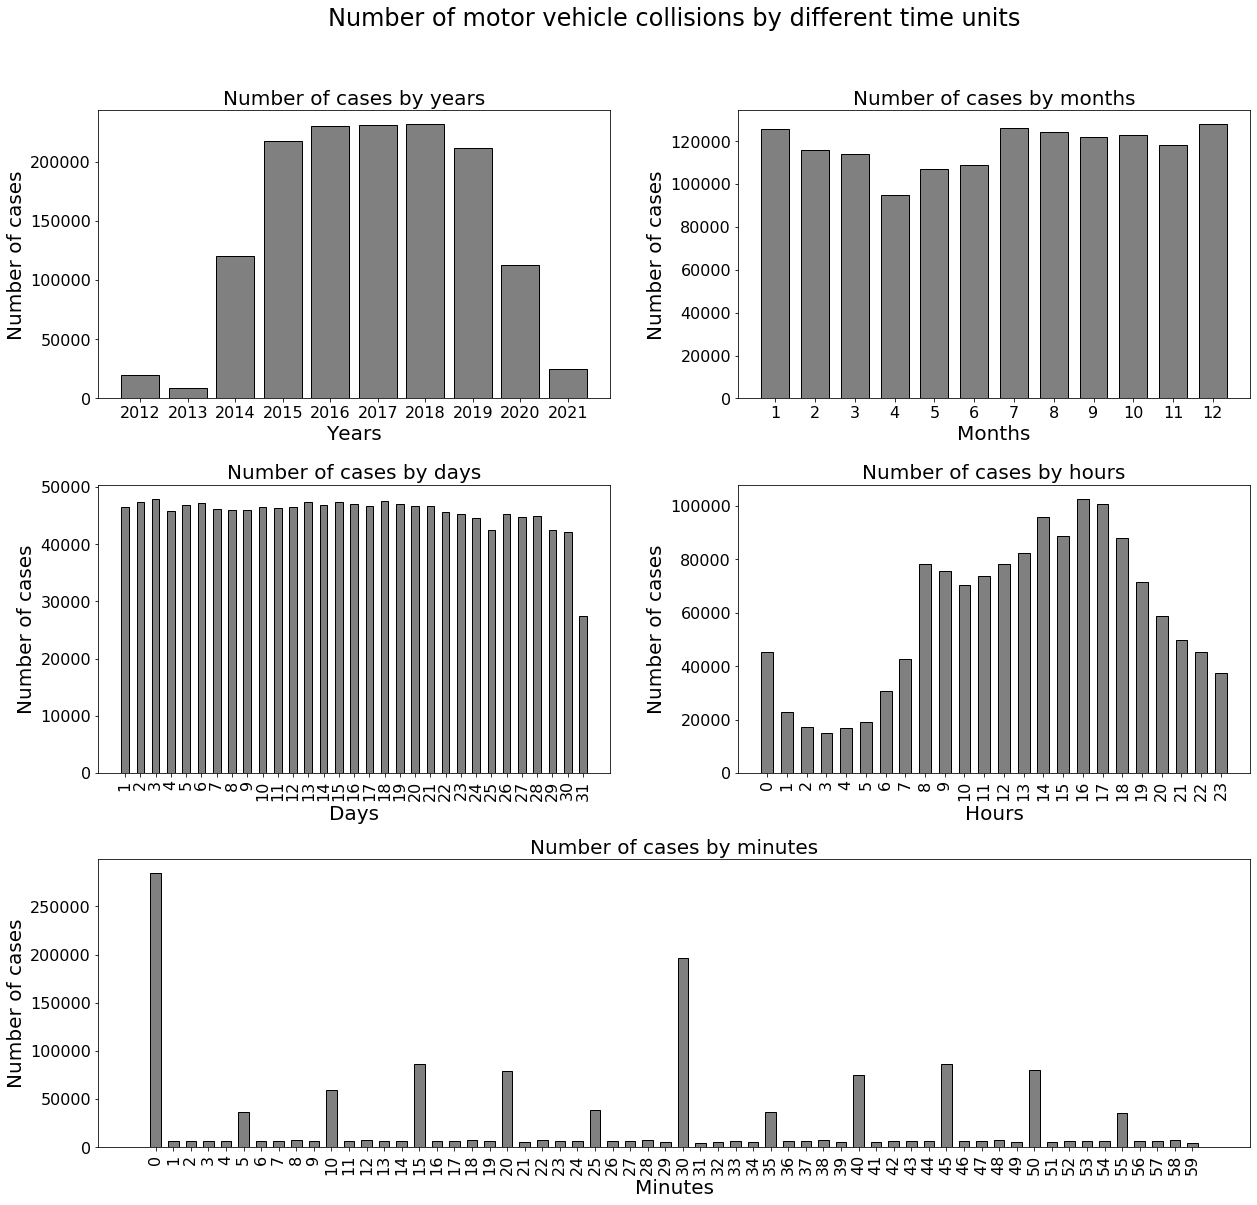

In [54]:
plt.figure(figsize=(20,18), constrained_layout=True) #dpi can be added to increase the clarity
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.3)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,1,3)
axes = [ax1, ax2, ax3, ax4, ax5]

axes[0].bar(count_year.index, count_year.values, width=0.8, color='grey', edgecolor='black')
axes[0].xaxis.set_tick_params(labelsize=16)
axes[0].yaxis.set_tick_params(labelsize=16)
axes[0].xaxis.set_ticks(np.arange(years[0], years[-1]+1, 1))
axes[0].xaxis.set_label_text('Years')
axes[0].yaxis.set_label_text('Number of cases')
axes[0].title.set_text('Number of cases by years')

axes[1].bar(count_month.index, count_month.values, width=0.7, color='grey', edgecolor='black')
axes[1].xaxis.set_tick_params(labelsize=16)
axes[1].yaxis.set_tick_params(labelsize=16)
axes[1].xaxis.set_ticks(np.arange(months[0], months[-1]+1, 1))
axes[1].xaxis.set_label_text('Months')
axes[1].yaxis.set_label_text('Number of cases')
axes[1].title.set_text('Number of cases by months')

axes[2].bar(count_day.index, count_day.values, width=0.5, color='grey', edgecolor='black')
axes[2].tick_params(axis='x', rotation=90)
axes[2].xaxis.set_tick_params(labelsize=16)
axes[2].yaxis.set_tick_params(labelsize=16)
axes[2].xaxis.set_ticks(np.arange(days[0], days[-1]+1, 1))
axes[2].xaxis.set_label_text('Days')
axes[2].yaxis.set_label_text('Number of cases')
axes[2].title.set_text('Number of cases by days')

axes[3].bar(count_hour.index, count_hour.values, width=0.6, color='grey', edgecolor='black')
axes[3].tick_params(axis='x', rotation=90)
axes[3].xaxis.set_tick_params(labelsize=16)
axes[3].yaxis.set_tick_params(labelsize=16)
axes[3].xaxis.set_ticks(np.arange(hours[0], hours[-1]+1, 1))
axes[3].xaxis.set_label_text('Hours')
axes[3].yaxis.set_label_text('Number of cases')
axes[3].title.set_text('Number of cases by hours')

axes[4].bar(count_minute.index, count_minute.values, width=0.6, color='grey', edgecolor='black')
axes[4].tick_params(axis='x', rotation=90)
axes[4].xaxis.set_tick_params(labelsize=16)
axes[4].yaxis.set_tick_params(labelsize=16)
axes[4].xaxis.set_ticks(np.arange(minutes[0], minutes[-1]+1, 1))
axes[4].xaxis.set_label_text('Minutes')
axes[4].yaxis.set_label_text('Number of cases')
axes[4].title.set_text('Number of cases by minutes')

plt.suptitle('Number of motor vehicle collisions by different time units', fontsize=24)
plt.show()

### Number of motor vehicle collisions by different boroughs ###
The ranking of boroughs by the number of cases is Brooklyn, Queens, Manhattan, Bronx and Staten Island, where Bronx and Staten Island have far less cases than other boroughs. 

<BarContainer object of 5 artists>

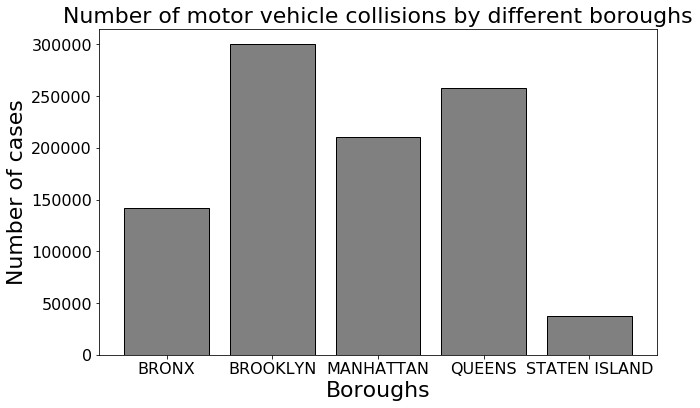

In [55]:
#cases by different boroughs in NYC
plt.figure(figsize=(10,6)) #dpi can be added to increase the clarity
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Boroughs", fontsize=22)
plt.ylabel("Number of cases", fontsize=22)
plt.title("Number of motor vehicle collisions by different boroughs", fontsize=22)
plt.bar(count_borough.index, count_borough.values, width=0.8, color='grey', edgecolor='black')

### Number of motor vehicle collisions by injured/killed ###
By looking at the figure for number of motor vehicle collisions by injured/killed, we can conclude that most of the motor vehicle collisions are small conflicts, which did not have people on road injured or killed. Motorists are more likely to get injured/killed in collisions than others, because they are with much faster speed than cyclists and pedestrians. 

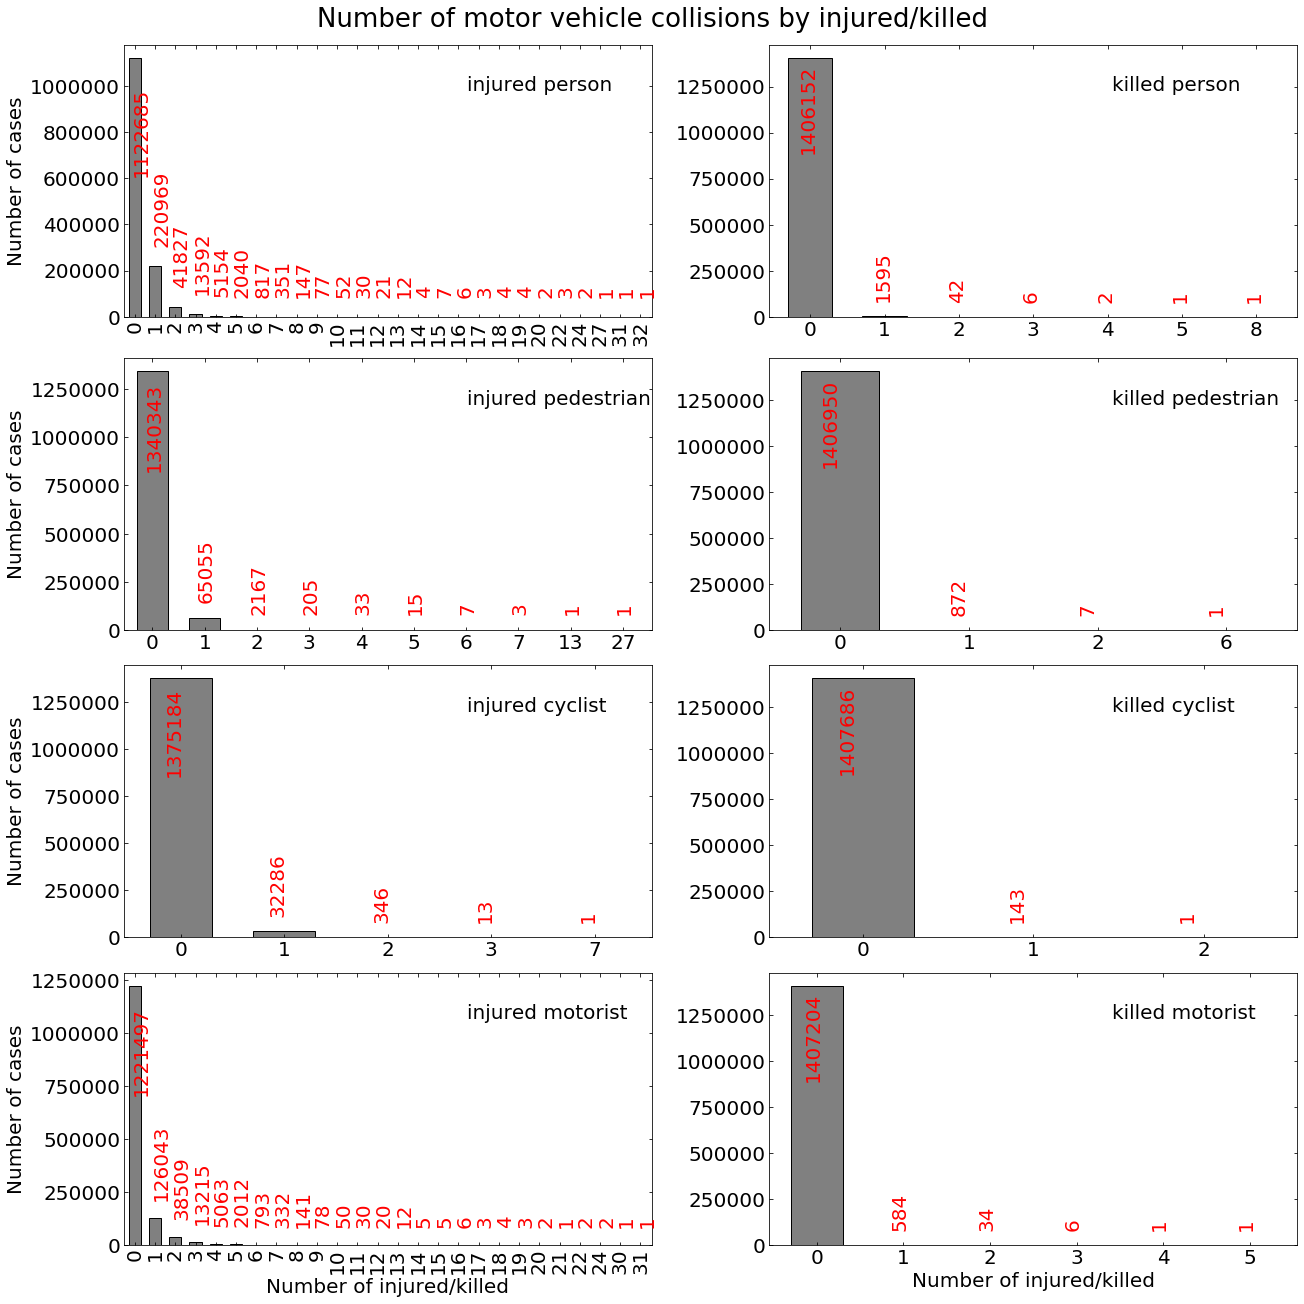

In [56]:
#create a dictionary for different types of injured and killed
ik_dic = {'ik' : [person_injured, person_killed, pedestrian_injured, pedestrian_killed,
                 cyclist_injured, cyclist_killed, motorist_injured, motorist_killed],
         'label' : ["injured person", "killed person", "injured pedestrian", "killed pedestrian",
                   "injured cyclist", "killed cyclist", "injured motorist", "killed motorist"]}

#the number of injured and killed
fig, axes = plt.subplots(4, 2, figsize=(18,18), constrained_layout=True) #dpi can be added to increase the clarity
for ik, label, ax in zip(ik_dic['ik'], ik_dic['label'], axes.flat):
    ik.index = ik.index.astype(int) #make the index without any decimals
    ik.plot(kind='bar', ax=ax, color='grey', edgecolor='black', width=0.6)
    ax.tick_params(right=True, top=True, direction="in", labelrotation = 0, labelsize=20)
    ax.text(0.65, 0.85, label, fontsize=20, horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    values = np.array(ik.values)
    for i, v in enumerate(values):
        if i == 0:
            ax.text(i-0.15, v-500000, str(v), fontsize=20, color='red', rotation=90)
        else:
            ax.text(i-0.15, v+100000, str(v), fontsize=20, color='red', rotation=90)
axes[0, 0].tick_params(axis='x', right=True, top=True, direction="in", labelrotation = 90, labelsize=20)
axes[3, 0].tick_params(axis='x', right=True, top=True, direction="in", labelrotation = 90, labelsize=20)
plt.setp(axes[-1, :], xlabel='Number of injured/killed')
plt.setp(axes[:, 0], ylabel='Number of cases')
fig.suptitle('Number of motor vehicle collisions by injured/killed', fontsize=26)
plt.show()

In [108]:
#interactive legends with Bokeh for contributing factors of different vehicles envolved

#count the top 5 contributing factor of different vehicles in each collision
#in most of the cases, the contributing factor is not recorded, so we eliminate the one counted most("Unspecified")
v1_factor = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower().value_counts()[1:6]
v2_factor = df['CONTRIBUTING FACTOR VEHICLE 2'].str.lower().value_counts()[1:6]
v3_factor = df['CONTRIBUTING FACTOR VEHICLE 3'].str.lower().value_counts()[1:6]
v4_factor = df['CONTRIBUTING FACTOR VEHICLE 4'].str.lower().value_counts()[1:6]
v5_factor = df['CONTRIBUTING FACTOR VEHICLE 5'].str.lower().value_counts()[1:6]
lsFactor = [v1_factor, v2_factor, v3_factor, v4_factor, v5_factor]

factor = v1_factor.index.values.tolist() + v2_factor.index.values.tolist() + v3_factor.index.values.tolist() + v4_factor.index.values.tolist() + v5_factor.index.values.tolist()
res = [] #remove duplicated factors 
for i in factor:
    if i not in res:
        res.append(i)

vehicle = ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4', 'Vehicle 5']

byFactor = pd.DataFrame(index=res, columns=vehicle)
for i in range(len(lsFactor)):
    for j in range(np.shape(byFactor.values)[1]):
        for z in range(np.shape(byFactor.values)[0]):
            if lsFactor[i].index.values.tolist()[j] == byFactor[vehicle[i]].index.values.tolist()[z]:
                byFactor[vehicle[i]].values[z] = lsFactor[i].values[j]

for col in range(np.shape(byFactor.values)[1]):
    byFactor[vehicle[col]] = byFactor[vehicle[col]].fillna(0)
    byFactor[vehicle[col]] = byFactor[vehicle[col]]/byFactor[vehicle[col]].sum()     
    
factors = byFactor.index.values.tolist()
dic_1 = {'factors': factors}
for v in range(len(vehicle)):
    dic_1[vehicle[v]] = byFactor[vehicle[v]]
source_1 = ColumnDataSource(dic_1) 

### Distribution of collisions' contributing factors with different vehicles envolved ###

**NOTE: make sure to trust the notebook (File > Trust notebook)**

According to the data-set, the contributing factors of at most 5 vehicles enrolled in collisions were recorded. The order of vehicle indicates the order of accident liability. The Bokeh graph with interactive legend below illustrates the top5 contributing factors of different vehicles included in collisions. The contributing factors on the x-axis are more than 5, because they are varied from different vehicles. Most of the contributing factors are the same with different vehicles but some are different. For the two vehicles taking main accident liability, the contributing factors are most likely to be driver inattention/distraction. The leading factors of the other vehicles are 'other vehiclular' followed by 'following too closely' and 'driver inattention/distraction'. This reveals that the crash of other vehicles mainly due to the crash of the first two vehicles, following too closely with the crashed vehicles and the drivers inattention to the occurring collisions. 

Inspired from the analytical result, we are aware that the crash of vehicles sharing main liability can be reduced by drivers paying more attention to circumstances on road. Most importantly, the crash of other vehicles can actually be significantly decreased by not following vehicles too closely and always being aware of what is happening on road.   

In [109]:
output_notebook() # load BokehJS in order to see visualizations in Jupyter framework


p_1 = figure(x_range = FactorRange(factors=factors), plot_width=980, plot_height=400, 
           title='Top 5 contributing factors of different vehicles in collisions', 
          x_axis_label='Contributing factors', y_axis_label='Probability/Frequency')
bar = {}
items = []
for index,i,color in zip(np.arange(0, len(vehicle), 1), vehicle, bokeh.palettes.mpl['Plasma'][5]):
    bar[i] = p_1.vbar(x='factors', top=i, source=source_1, width=0.7, muted_alpha=0.03, muted=True, 
                   fill_color=color, line_alpha=1.5, line_color='black') 
    items.append((i, [bar[i]]))
legend = Legend(items=items, location=(0, 60))
p_1.xaxis.major_label_orientation = math.pi/6
p_1.add_layout(legend, 'left')
p_1.legend.click_policy="mute"
show(p_1)

Loading BokehJS ...

In [155]:
df_type = df.iloc[:, [-5, -4, -3, -2, -1]] #navigate to columns with information about vehicle types
for i in range(np.shape(df_type.values)[1]):
    #change reported text into lowercase but keep NAN
    ref = df_type.iloc[:, [i]].squeeze().map(lambda x: x.lower() if isinstance(x,str) else x)
    #merge reported text with the same meaning
    ref = ref.str.replace('sport utility / station wagon', 'station wagon/sport utility vehicle')
    #change 'other' and 'unknown' to NAN since they make no sense
    ref = ref.replace('other', np.nan)
    ref = ref.replace('unknown', np.nan)
    df_type.iloc[:, [i]] = pd.DataFrame(ref)

type1 = df_type['VEHICLE TYPE CODE 1'].value_counts()[:10]
type2 = df_type['VEHICLE TYPE CODE 2'].value_counts()[:10]
type3 = df_type['VEHICLE TYPE CODE 3'].value_counts()[:10]
type4 = df_type['VEHICLE TYPE CODE 4'].value_counts()[:10]
type5 = df_type['VEHICLE TYPE CODE 5'].value_counts()[:10]
lsType = [type1, type2, type3, type4, type5]

types = type1.index.values.tolist() + type2.index.values.tolist() + type3.index.values.tolist() + type4.index.values.tolist() + type5.index.values.tolist()
Type = [] #remove duplicated types
for i in types:
    if i not in Type:
        Type.append(i)

byType = pd.DataFrame(index=Type, columns=vehicle)
for i in range(len(lsType)): #range(5)
    for j in range(10): #top10 types of vehicles
        for z in range(np.shape(byType.values)[0]): #range(14)
            if lsType[i].index.values.tolist()[j] == byType[vehicle[i]].index.values.tolist()[z]:
                byType[vehicle[i]].values[z] = lsType[i].values[j]
                
for col in range(np.shape(byType.values)[1]):
    byType[vehicle[col]] = byType[vehicle[col]].fillna(0)
    byType[vehicle[col]] = byType[vehicle[col]]/byType[vehicle[col]].sum()

types = byType.index.values.tolist()
dic_2 = {'types': types}
for v in range(len(vehicle)):
    dic_2[vehicle[v]] = byType[vehicle[v]]
source_2 = ColumnDataSource(dic_2) 

### Distribution of collisions' vehicle types with different vehicles envolved ###

**NOTE: make sure to trust the notebook (File > Trust notebook)**

Unlike the distribution of contributing factors, the distribution of vehicle types are basically the same with vehicles sharing different priorities of accident liability. For vehicles enrolled in crashes, no matter if it is the one sharing main liability (Vehicle 1) or the one sharing the least liability (Vehicle 5), they exert the large probability that they are station wagon/sport utility vehicle(SUV) or sedans. They are also likely to be passenger vehicle with many passengers on board. It seems that vehicles with good utility are more likely to collide, because these vehicles can accelerate within short time, be with heavy self weight and be hard to pull over. Therefore, we strongly suggest drivers of SUV, sedans(especially 4-dr) and passenger vehicle to pay more attention to the road condition in order to bring less damage.

In [158]:
p_2 = figure(x_range = FactorRange(factors=types), plot_width=980, plot_height=400, 
           title='Top 10 types of different vehicles in collisions', 
          x_axis_label='Vehicle types', y_axis_label='Probability/Frequency')
bar = {}
items = []
for index,i,color in zip(np.arange(0, len(vehicle), 1), vehicle, bokeh.palettes.mpl['Plasma'][5]):
    bar[i] = p_2.vbar(x='types', top=i, source=source_2, width=0.7, muted_alpha=0.02, muted=True, 
                   fill_color=color, line_alpha=1.5, line_color='black') 
    items.append((i, [bar[i]]))
legend = Legend(items=items, location=(0, 60))
p_2.xaxis.major_label_orientation = math.pi/6
p_2.add_layout(legend, 'left')
p_2.legend.click_policy="mute"
show(p_2)

## References ##
[1]
Data on Motor Vehicle Collisions - Crashes. <a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95</a>